In [1]:
import os

print(os.listdir())  # Şu anki klasördeki dosyaları listeler


['.config', 'magaza_yorumlari.csv', 'sample_data']


In [5]:
# Gerekli kütüphaneleri yükleyelim
!pip install wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

print("Kütüphaneler başarıyla yüklendi.")


Kütüphaneler başarıyla yüklendi.


Proje: Türkçe Mağaza Yorumları ile Müşteri Duygu Analizi
Amaç: Bu projenin temel amacı, bir e-ticaret platformundan toplanan Türkçe mağaza yorumlarını kullanarak, müşterilerin deneyimlerinin "Olumlu" mu yoksa "Olumsuz" mu olduğunu otomatik olarak tespit eden makine öğrenmesi modelleri geliştirmektir. Bu modellerin performansları karşılaştırılarak en uygun algoritma belirlenecektir.
Veri Kaynağı: Projede magaza_yorumlari.csv adlı veri seti kullanılmıştır. Veri seti, kullanıcı yorumlarını içeren 'Yorum' sütunu ve bu yorumların 'Durum' ('olumlu'/'olumsuz') olarak etiketlendiği bir sütundan oluşmaktadır.

In [10]:
with open('magaza_yorumlari.csv', encoding='ISO-8859-9') as f:
    for _ in range(5):
        print(f.readline())


ÿşG ö r ü _, D u r u m 

 

 " Ü r ü n   g a y e t   g ü z e l   b o y u t l a r 1    d ö r t   k i _i l i k   a i l e   i ç i n   y e t e r l i   7   g ü n d e 

 t e s l i m   e t t i l e r " , O l u m l u 

 



In [12]:
import pandas as pd

# Dosyayı doğru şekilde oku
df = pd.read_csv(
    'magaza_yorumlari.csv',
    encoding='ISO-8859-9',
    sep=',',
    engine='python',
    on_bad_lines='skip'  # Bu satır yeni versiyonlarda geçerli
)

# Sütun adlarını düzelt (gerekirse)
df.columns = ['Yorum', 'Durum']

# İlk birkaç satırı göster
print(df.head())


                                               Yorum          Durum
0                                                              None
1   " Ü r ü n   g a y e t   g ü z e l   b o y u t...           None
2                     t e s l i m   e t t i l e r "    O l u m l u 
3                                                              None
4   Ü r ü n ü   k u l l a n d 1m   g a y e t   m...   O l u m l u 


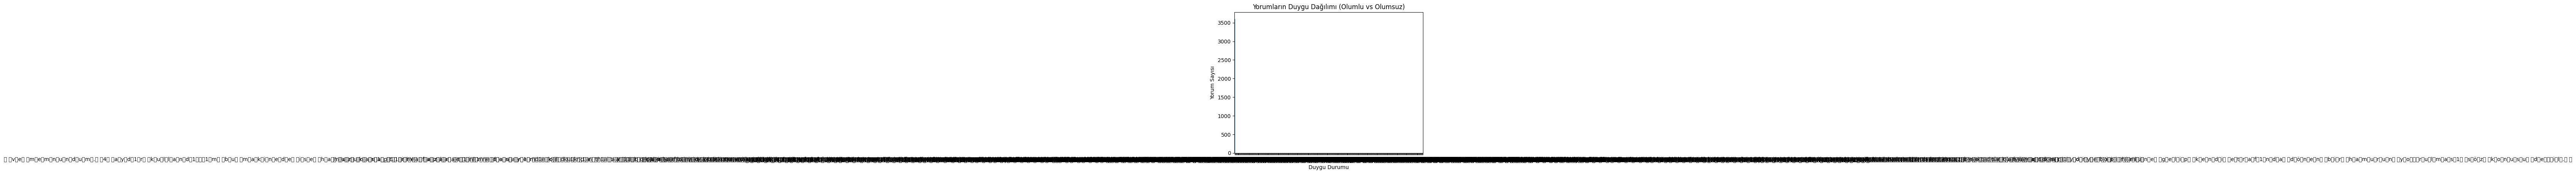

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Durum', data=df)
plt.title('Yorumların Duygu Dağılımı (Olumlu vs Olumsuz)')
plt.xlabel('Duygu Durumu')
plt.ylabel('Yorum Sayısı')
plt.show()


In [19]:
import pandas as pd

# Farklı encoding deneyelim: UTF-16
df = pd.read_csv('magaza_yorumlari.csv', encoding='utf-16', sep=',', engine='python')

print(df.head())
print(df['Durum'].unique())


                                               Görüş    Durum
0  Ürün gayet güzel boyutları  dört kişilik aile ...   Olumlu
1                     Ürünü kullandım gayet memnunum   Olumlu
2                                        Hızlı kargo   Olumlu
3  8 yıl önce lg 42 lm serisi almıştım ve tv den ...  Olumsuz
4  ürün fena değil ancak gövdenin plastik olması ...   Olumlu
['Olumlu' 'Olumsuz']


In [20]:
df = df.dropna(subset=['Görüş', 'Durum'])
df['Durum'] = df['Durum'].str.strip().str.lower()


In [21]:
olumlu_yorumlar = " ".join(df[df['Durum'] == 'olumlu']['Görüş'].astype(str))
olumsuz_yorumlar = " ".join(df[df['Durum'] == 'olumsuz']['Görüş'].astype(str))


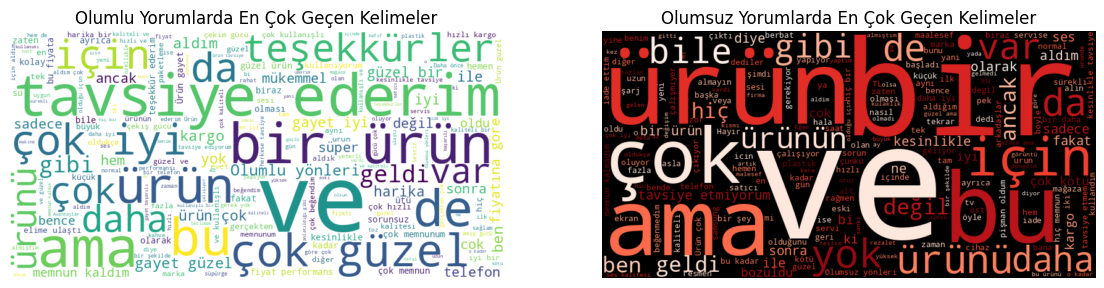

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_olumlu = WordCloud(width=800, height=400, background_color='white').generate(olumlu_yorumlar)
wordcloud_olumsuz = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(olumsuz_yorumlar)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_olumlu, interpolation='bilinear')
plt.axis('off')
plt.title('Olumlu Yorumlarda En Çok Geçen Kelimeler')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_olumsuz, interpolation='bilinear')
plt.axis('off')
plt.title('Olumsuz Yorumlarda En Çok Geçen Kelimeler')

plt.show()


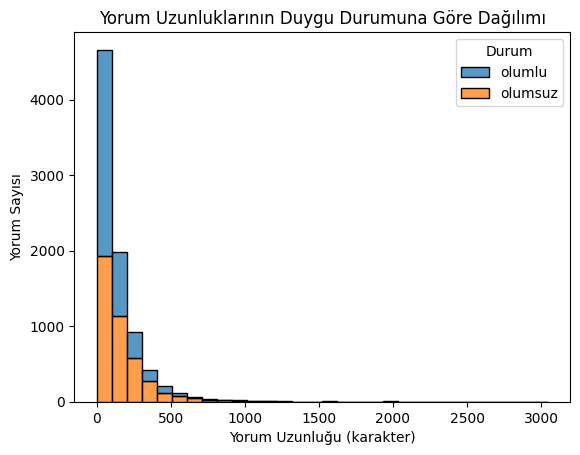

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yorumların karakter uzunluğunu hesapla
df['yorum_uzunlugu'] = df['Görüş'].apply(lambda x: len(str(x)))

# Yorum uzunluklarını, duygu durumlarına göre görselleştir
sns.histplot(data=df, x='yorum_uzunlugu', hue='Durum', multiple='stack', bins=30)

plt.title('Yorum Uzunluklarının Duygu Durumuna Göre Dağılımı')
plt.xlabel('Yorum Uzunluğu (karakter)')
plt.ylabel('Yorum Sayısı')
plt.show()


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Görüş']
y = df['Durum']

vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Test verisi ile tahmin yapalım
y_pred = model.predict(X_test)

# Başarı oranı (doğruluk)
print("Modelin Başarı Oranı (Accuracy):", accuracy_score(y_test, y_pred))

# Daha detaylı performans raporu
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Modelin Başarı Oranı (Accuracy): 0.9040047114252061

Sınıflandırma Raporu:
               precision    recall  f1-score   support

      olumlu       0.94      0.87      0.90       855
     olumsuz       0.88      0.94      0.91       843

    accuracy                           0.90      1698
   macro avg       0.91      0.90      0.90      1698
weighted avg       0.91      0.90      0.90      1698

